In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [3]:
data = pd.read_csv('train.csv')
data1 = pd.read_csv('test_2.csv')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
all_data = pd.concat((data.loc[:, 'MSSubClass':'SaleCondition'], data1.loc[:, 'MSSubClass':'SaleCondition']))

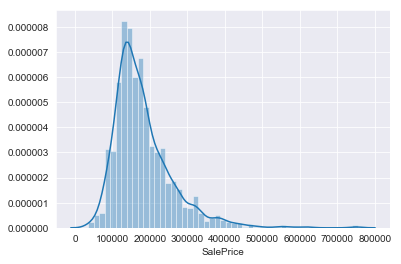

In [7]:
sns.distplot(data['SalePrice'])

In [8]:
#Positive skewness
#Kurtosis finds the length of the tail and if the tail is long we have more outliers
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [9]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

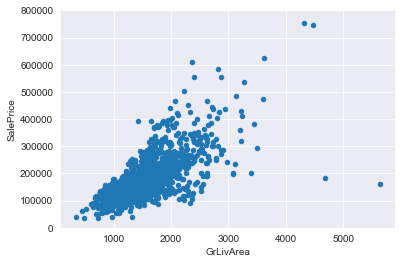

In [10]:
var = 'GrLivArea'
dat = pd.concat([data['SalePrice'], data[var]], axis=1)
dat.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [11]:
data.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [12]:
df = data1['Id']

In [13]:
data = data.drop(data[data['Id'] == 1299].index)
data = data.drop(data[data['Id'] == 524].index)

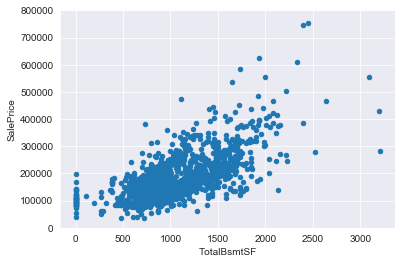

In [14]:
var = 'TotalBsmtSF'
dat1 = pd.concat([data['SalePrice'], data[var]], axis=1)
dat1.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

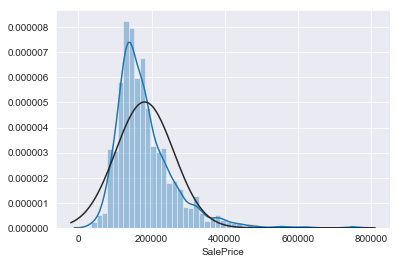

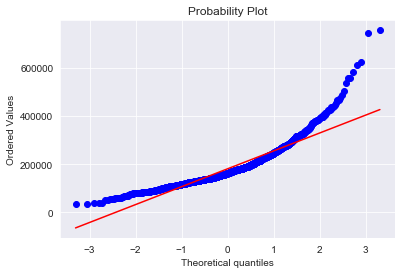

In [15]:
sns.distplot(data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

In [16]:
data['SalePrice'] = np.log(data['SalePrice'])

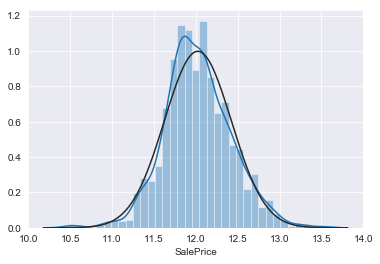

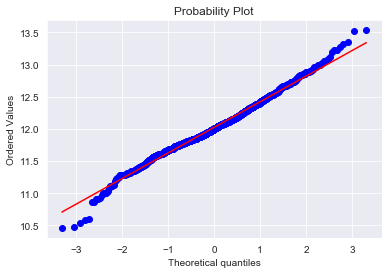

In [17]:
sns.distplot(data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

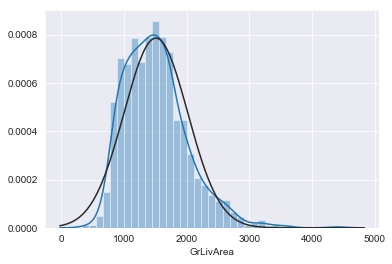

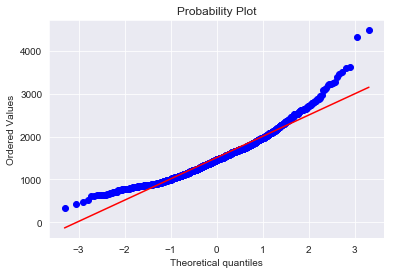

In [18]:
sns.distplot(data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['GrLivArea'], plot=plt)

In [19]:
data['GrLivArea'] = np.log(data['GrLivArea'])

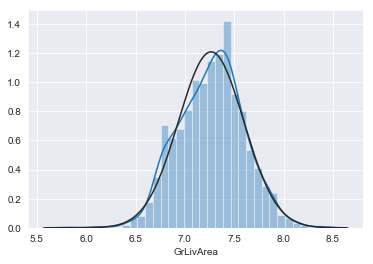

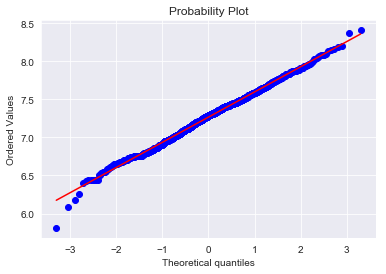

In [20]:
sns.distplot(data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['GrLivArea'], plot=plt)

## We have solved the problem of normality by removing the right skewness and also removed heteroschedaticity

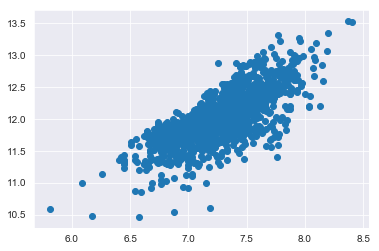

In [21]:
plt.scatter(data['GrLivArea'], data['SalePrice']);

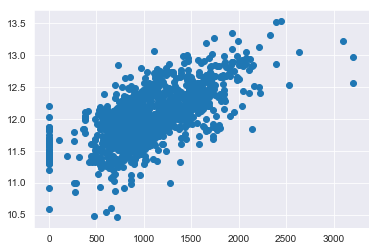

In [22]:
plt.scatter(data['TotalBsmtSF'], data['SalePrice']);

## The graphs were conic and now they are more linear
## This is to find the most important features 

In [44]:
corr = data.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice            1.000000
OverallQual          0.821404
SimplOverallQual     0.706726
ExterQual            0.682225
GarageCars           0.681033
KitchenQual          0.669989
SimplExterQual       0.635358
BsmtQual             0.616897
SimplKitchenQual     0.609207
FullBath             0.595899
SimplBsmtQual        0.592388
FireplaceQu          0.546791
TotRmsAbvGrd         0.537702
SimplFireplaceQu     0.513817
Fireplaces           0.491998
HeatingQC            0.473938
MasVnrArea           0.430569
SimplHeatingQC       0.397145
BsmtFinSF1           0.392283
GarageQual           0.363258
GarageCond           0.356766
BsmtExposure         0.338131
BsmtFinType1         0.335000
WoodDeckSF           0.334250
BoughtOffPlan        0.326535
OpenPorchSF          0.325215
2ndFlrSF             0.319953
HalfBath             0.314186
SimplGarageQual      0.311044
PavedDrive           0.304683
                       ...   
SimplBsmtFinType2    0.103910
PoolQC               0.085825
SimplPoolQ

In [45]:
count = 0
for i in range(38):
    if(abs(corr.SalePrice[i])):
        count = count + corr.SalePrice[i]
print(count/38)

0.44745661378820334


In [46]:
l = ['SalePrice','OverallQual','SimplOverallQual','ExterQual','GarageCars','KitchenQual','SimplExterQual','BsmtQual','SimplKitchenQual',
'FullBath','SimplBsmtQual','FireplaceQu','TotRmsAbvGrd','SimplFireplaceQu','Fireplaces','HeatingQC']
for i in data.columns:
    if i not in l:
        data = data.drop(i,axis = 1)
print(data.columns)

Index(['OverallQual', 'ExterQual', 'BsmtQual', 'HeatingQC', 'FullBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageCars', 'SalePrice', 'SimplOverallQual', 'SimplFireplaceQu',
       'SimplKitchenQual', 'SimplBsmtQual', 'SimplExterQual'],
      dtype='object')


In [47]:
l = ['SalePrice','OverallQual','SimplOverallQual','ExterQual','GarageCars','KitchenQual','SimplExterQual','BsmtQual','SimplKitchenQual',
'FullBath','SimplBsmtQual','FireplaceQu','TotRmsAbvGrd','SimplFireplaceQu','Fireplaces','HeatingQC']
for i in data1.columns:
    if i not in l:
        data1 = data1.drop(i,axis = 1)
print(data1.columns)

Index(['OverallQual', 'ExterQual', 'BsmtQual', 'HeatingQC', 'FullBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageCars', 'SimplOverallQual', 'SimplFireplaceQu',
       'SimplKitchenQual', 'SimplBsmtQual', 'SimplExterQual'],
      dtype='object')


## Remove the missing values

In [ ]:
b=list(data1.columns)
for i in b :
    print(i)
    print(data1[i].isnull().sum())
    print(data1[i].unique())
    print('-------')

In [23]:
#data1.TotalBsmtSF=data1.TotalBsmtSF.fillna(0)
#data1.GarageYrBlt=data1.GarageYrBlt.fillna(0)
data1.GarageCars=data1.GarageCars.fillna(0)
#data1.GarageArea=data1.GarageArea.fillna(0)
#data.GarageYrBlt= data.GarageYrBlt.fillna(0)

#data1.MSZoning=data1.MSZoning.fillna("No")
#data1.LotFrontage=data1.LotFrontage.fillna(0)
#data1.Alley=data1.Alley.fillna("No")
#data1.Utilities=data1.Utilities.fillna("No")
#data1.Exterior1st= data1.Exterior1st.fillna("No")

#data1.Exterior2nd=data1.Exterior2nd.fillna("No")
#data1.MasVnrType=data1.MasVnrType.fillna("No")
#data1.MasVnrArea=data1.MasVnrArea.fillna(0)
data1.BsmtQual=data1.BsmtQual.fillna("No")
#data1.BsmtCond= data1.BsmtCond.fillna("No")

#data1.BsmtExposure=data1.BsmtExposure.fillna("No")
#data1.BsmtFinType1=data1.BsmtFinType1.fillna("No")
#data1.BsmtFinSF1=data1.BsmtFinSF1.fillna(0)
#data1.BsmtFinType2=data1.BsmtFinType2.fillna("No")
#data1.BsmtFinSF2= data1.BsmtFinSF2.fillna(0)

#data1.BsmtUnfSF=data1.BsmtUnfSF.fillna(0)
#data1.BsmtFullBath=data1.BsmtFullBath.fillna("No")
#data1.BsmtHalfBath=data1.BsmtHalfBath.fillna("No")
data1.KitchenQual=data1.KitchenQual.fillna("No")
#data1.Functional= data1.Functional.fillna("No")

data1.FireplaceQu=data1.FireplaceQu.fillna("No")
#data1.SimplBsmtQual=data1.SimplBsmtQual.fillna("No")

#data1.SimplKitchenQual=data1.SimplKitchenQual.fillna("No")

#data1.SimplFireplaceQu=data1.SimplFireplaceQu.fillna("No")
#data1.GarageType=data1.GarageType.fillna("No")
#data1.GarageFinish=data1.GarageFinish.fillna("No")
#data1.GarageQual=data1.GarageQual.fillna("No")
#data1.GarageCond=data1.GarageCond.fillna("No")
#data1.PoolQC= data1.PoolQC.fillna("No")

#data1.Fence=data1.Fence.fillna("No")
#data1.MiscFeature=data1.MiscFeature.fillna("No")
#data1.SaleType=data1.SaleType.fillna("No")

In [24]:
b=list(data.columns)
for i in b :
    print(i)
    print(data[i].isnull().sum())
    print(data[i].unique())
    print('-------')

Id
0
[   1    2    3 ... 1458 1459 1460]
-------
MSSubClass
0
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
-------
MSZoning
0
['RL' 'RM' 'C (all)' 'FV' 'RH']
-------
LotFrontage
259
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
-------
LotArea
0
[ 8450  9600 11250 ... 17217 13175  9717]
-------
Street
0
['Pave' 'Grvl']
-------
Alley
1367
[nan 'Grvl' 'Pave']
-------
LotShape
0
['Reg' 'IR1' 'IR2' 'IR3']
-------
LandContour
0
['Lvl' 'Bnk' 'Low' 'HLS']
-------
Util

0
['Ex' 'Gd' 'TA' 'Fa' 'Po']
-------
CentralAir
0
['Y' 'N']
-------
Electrical
1
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
-------
1stFlrSF
0
[ 856 1262  920  961 1145  796 1694 1107 1022 1077 1040 1182  912 1494
 1253  854 1004 1296 1114 1339 1158 1108 1795 1060 1600  900 1704  520
  649 1228 1234 1700 1561 1132 1097 1297 1057 1152 1324 1328  884  938
 1150 1752 1518 1656  736  955  794  816 1842 1360 1425  983  860 1426
  780  581 1370  902 1143 2207 1479  747 1304 2223  845  885 1086  840
  526  952 1072 1768  682 1337 1563 1065  804 1301  684  612 1013  990
 1235  964 1260  905  680 1588  960  835 1225 1610  977 1535 1226 1053
 1047  789  997 1844 1216  774 1282 2259 1436  729 1092 1125 1699  728
  988  772 1080 1199 1586  958  660 1327 1721 1682 1214 1959  928  864
 1734  910 1501 1728  970  875  896  969 1710 1252 1200  572  991 1392
 1232 1572 1541  882 1149  808 1867 1707 1064 1362 1651 2158 1164 2234
  968  769  901 1340  936 1217 1224 1593 1549  725 1431  855 1726  929
 171

In [25]:
data.GarageYrBlt=data.GarageYrBlt.fillna(0)
data.GarageCars=data.GarageCars.fillna(0)
data.GarageArea=data.GarageArea.fillna(0)
data.GarageYrBlt= data.GarageYrBlt.fillna(0)

data.LotFrontage=data.LotFrontage.fillna(0)
data.Alley=data.Alley.fillna("No")

data.MasVnrType=data.MasVnrType.fillna("No")
data.MasVnrArea=data.MasVnrArea.fillna(0)
data.BsmtQual=data.BsmtQual.fillna("No")
data.BsmtCond= data.BsmtCond.fillna("No")

data.BsmtExposure=data.BsmtExposure.fillna("No")
data.BsmtFinType1=data.BsmtFinType1.fillna("No")

data.BsmtFinType2=data.BsmtFinType2.fillna("No")
data.Electrical=data.Electrical.fillna(0)
data.BsmtFullBath=data.BsmtFullBath.fillna("No")
data.BsmtHalfBath=data.BsmtHalfBath.fillna("No")

data.FireplaceQu=data.FireplaceQu.fillna("No")
data.GarageType=data.GarageType.fillna("No")
data.GarageFinish=data.GarageFinish.fillna("No")
data.GarageQual=data.GarageQual.fillna("No")
data.GarageCond=data.GarageCond.fillna("No")
data.PoolQC= data.PoolQC.fillna("No")

data.Fence=data.Fence.fillna("No")
data.MiscFeature=data.MiscFeature.fillna("No")

In [26]:
for i in data.YearRemodAdd:
    if(i < 1960):
        data.YearRemodAdd.replace([i],[1],inplace = True)
    elif(i >= 1960 and i < 1980 ):
        data.YearRemodAdd.replace([i],[2],inplace = True)
    elif(i >= 1980 and i < 2000):
        data.YearRemodAdd.replace([i],[3],inplace = True)
    else:
        data.YearRemodAdd.replace([i],[4],inplace = True)
        
for i in data.YearBuilt:
    if(i < 1925):
        data.YearBuilt.replace([i],[1],inplace = True)
    elif(i >= 1925 and i < 1960 ):
        data.YearBuilt.replace([i],[2],inplace = True)
    elif(i >= 1960 and i < 2000):
        data.YearBuilt.replace([i],[3],inplace = True)
    else:
        data.YearBuilt.replace([i],[4],inplace = True)
        
for i in data.TotalBsmtSF:
    if(i < 500):
        data.TotalBsmtSF.replace([i],[1],inplace = True)
    elif(i >= 500 and i < 1000 ):
        data.TotalBsmtSF.replace([i],[2],inplace = True)
    elif(i >= 1000 and i < 1500):
        data.TotalBsmtSF.replace([i],[3],inplace = True)
    elif(i >= 1500 and i < 2000):
        data.TotalBsmtSF.replace([i],[4],inplace = True)
    else:
        data.TotalBsmtSF.replace([i],[5],inplace = True)
        
for i in data['1stFlrSF']:
    if(i < 500):
        data['1stFlrSF'].replace([i],[1],inplace = True)
    elif(i >= 500 and i < 1000 ):
        data['1stFlrSF'].replace([i],[2],inplace = True)
    elif(i >= 1000 and i < 1500):
        data['1stFlrSF'].replace([i],[3],inplace = True)
    elif(i >= 1500 and i < 2000):
        data['1stFlrSF'].replace([i],[4],inplace = True)
    else:
        data['1stFlrSF'].replace([i],[5],inplace = True)
        
for i in data.GrLivArea:
    if(i < 6.5):
        data.GrLivArea.replace([i],[1],inplace = True)
    elif(i >= 6.5 and i < 7.0 ):
        data.GrLivArea.replace([i],[2],inplace = True)
    elif(i >= 7.0 and i < 7.5):
        data.GrLivArea.replace([i],[3],inplace = True)
    elif(i >= 7.5 and i < 8.0):
        data.GrLivArea.replace([i],[4],inplace = True)
    else:
        data.GrLivArea.replace([i],[5],inplace = True)
        
for i in data.GarageArea:
    if(i < 250):
        data.GarageArea.replace([i],[1],inplace = True)
    elif(i >= 250 and i < 500 ):
        data.GarageArea.replace([i],[2],inplace = True)
    elif(i >= 500 and i < 750):
        data.GarageArea.replace([i],[3],inplace = True)
    elif(i >= 750 and i < 1000):
        data.GarageArea.replace([i],[4],inplace = True)
    else:
        data.GarageArea.replace([i],[5],inplace = True)
        
for i in data.GarageYrBlt:
    if(i < 2000):
        data.GarageYrBlt.replace([i],[1],inplace = True)
    else:
        data.GarageYrBlt.replace([i],[2],inplace = True)
        
for i in data.LotFrontage:
    if(i < 25):
        data.LotFrontage.replace([i],[1],inplace = True)
    elif(i >= 25 and i < 50 ):
        data.LotFrontage.replace([i],[2],inplace = True)
    elif(i >= 50 and i < 75):
        data.LotFrontage.replace([i],[3],inplace = True)
    elif(i >= 75 and i < 100):
        data.LotFrontage.replace([i],[4],inplace = True)
    else:
        data.LotFrontage.replace([i],[5],inplace = True)

In [27]:
for i in data1.YearRemodAdd:
    if(i < 1960):
        data1.YearRemodAdd.replace([i],[1],inplace = True)
    elif(i >= 1960 and i < 1980 ):
        data1.YearRemodAdd.replace([i],[2],inplace = True)
    elif(i >= 1980 and i < 2000):
        data1.YearRemodAdd.replace([i],[3],inplace = True)
    else:
        data1.YearRemodAdd.replace([i],[4],inplace = True)
        
for i in data1.YearBuilt:
    if(i < 1925):
        data1.YearBuilt.replace([i],[1],inplace = True)
    elif(i >= 1925 and i < 1960 ):
        data1.YearBuilt.replace([i],[2],inplace = True)
    elif(i >= 1960 and i < 2000):
        data1.YearBuilt.replace([i],[3],inplace = True)
    else:
        data1.YearBuilt.replace([i],[4],inplace = True)
        
for i in data1.TotalBsmtSF:
    if(i < 500):
        data1.TotalBsmtSF.replace([i],[1],inplace = True)
    elif(i >= 500 and i < 1000 ):
        data1.TotalBsmtSF.replace([i],[2],inplace = True)
    elif(i >= 1000 and i < 1500):
        data1.TotalBsmtSF.replace([i],[3],inplace = True)
    elif(i >= 1500 and i < 2000):
        data1.TotalBsmtSF.replace([i],[4],inplace = True)
    else:
        data1.TotalBsmtSF.replace([i],[5],inplace = True)
        
for i in data1['1stFlrSF']:
    if(i < 500):
        data1['1stFlrSF'].replace([i],[1],inplace = True)
    elif(i >= 500 and i < 1000 ):
        data1['1stFlrSF'].replace([i],[2],inplace = True)
    elif(i >= 1000 and i < 1500):
        data1['1stFlrSF'].replace([i],[3],inplace = True)
    elif(i >= 1500 and i < 2000):
        data1['1stFlrSF'].replace([i],[4],inplace = True)
    else:
        data1['1stFlrSF'].replace([i],[5],inplace = True)
        
for i in data1.GrLivArea:
    if(i < 6.5):
        data1.GrLivArea.replace([i],[1],inplace = True)
    elif(i >= 6.5 and i < 7.0 ):
        data1.GrLivArea.replace([i],[2],inplace = True)
    elif(i >= 7.0 and i < 7.5):
        data1.GrLivArea.replace([i],[3],inplace = True)
    elif(i >= 7.5 and i < 8.0):
        data1.GrLivArea.replace([i],[4],inplace = True)
    else:
        data1.GrLivArea.replace([i],[5],inplace = True)
        
for i in data1.GarageArea:
    if(i < 250):
        data1.GarageArea.replace([i],[1],inplace = True)
    elif(i >= 250 and i < 500 ):
        data1.GarageArea.replace([i],[2],inplace = True)
    elif(i >= 500 and i < 750):
        data1.GarageArea.replace([i],[3],inplace = True)
    elif(i >= 750 and i < 1000):
        data1.GarageArea.replace([i],[4],inplace = True)
    else:
        data1.GarageArea.replace([i],[5],inplace = True)
        
for i in data1.GarageYrBlt:
    if(i < 2000):
        data1.GarageYrBlt.replace([i],[1],inplace = True)
    else:
        data1.GarageYrBlt.replace([i],[2],inplace = True)
        
for i in data1.LotFrontage:
    if(i < 25):
        data1.LotFrontage.replace([i],[1],inplace = True)
    elif(i >= 25 and i < 50 ):
        data1.LotFrontage.replace([i],[2],inplace = True)
    elif(i >= 50 and i < 75):
        data1.LotFrontage.replace([i],[3],inplace = True)
    elif(i >= 75 and i < 100):
        data1.LotFrontage.replace([i],[4],inplace = True)
    else:
        data1.LotFrontage.replace([i],[5],inplace = True)

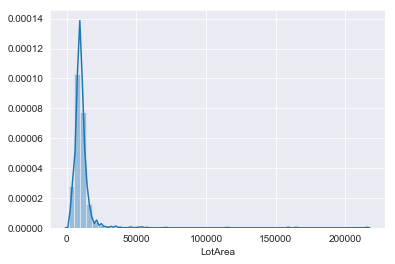

In [28]:
sns.distplot(data.LotArea)

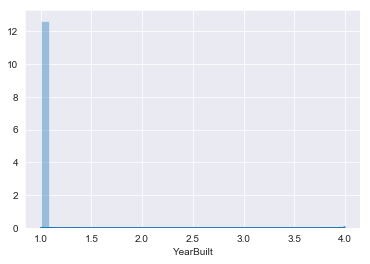

In [29]:
sns.distplot(data.YearBuilt)

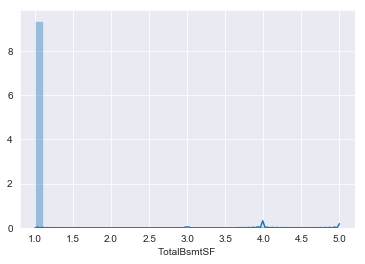

In [30]:
sns.distplot(data.TotalBsmtSF)

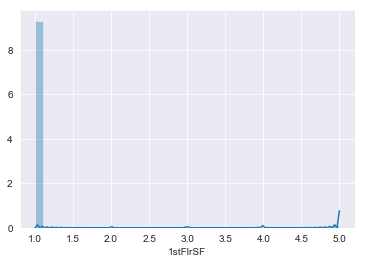

In [31]:
sns.distplot(data['1stFlrSF'])

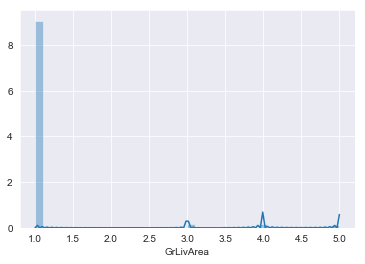

In [32]:
sns.distplot(data.GrLivArea)

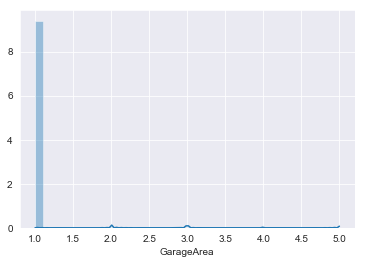

In [33]:
sns.distplot(data.GarageArea)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


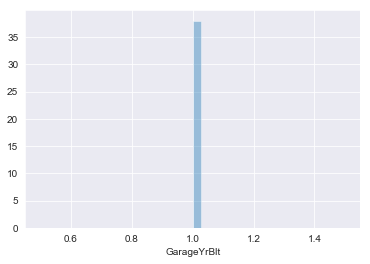

In [34]:
sns.distplot(data.GarageYrBlt)

In [35]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,1.0,8450,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,2,2008,WD,Normal,12.247694
1,2,20,RL,1.0,9600,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,5,2007,WD,Normal,12.109011
2,3,60,RL,1.0,11250,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,9,2008,WD,Normal,12.317167
3,4,70,RL,1.0,9550,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,1.0,14260,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,12,2008,WD,Normal,12.429216


In [36]:
#data = data.replace({"MSSubClass" : {"SC20" : 20, "SC30" : 30, "SC40" : 40, "SC45" : 45, "SC50" : 50, "SC60" : 60, "SC70" : 70,
 #                                    "SC75" : 75, "SC80" : 80, "SC85" : 85, "SC90" : 90,"SC120" : 120, "SC150" : 150,"SC160" : 160,"SC180" : 180,
  #                                   "SC190" : 190 }})

In [37]:
#data1 = data1.replace({"MSSubClass" : {"SC20":20, "SC30":30, "SC40":40, "SC45":45, 
  #                                     "SC50":50, "SC60":60, "SC70":70, "SC75":75,
  #                                     "SC80":80, "SC85":85, "SC90":90, "SC120":120, 
  #                                     "SC150":150, "SC160":160, "SC180":180, "SC190":190},
  #                     "MoSold" : {"Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "Jun":6,
 #                                  "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11, "Dec":12}
#                      })

In [38]:
data = data.replace({"Alley" : {"Grvl" : 1, "Pave" : 2,"No":3},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "MSZoning" : {'RL':0, 'RM':1, 'C (all)':2, 'FV':4, 'RH':5},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )
data1 = data1.replace({"Alley" : {"Grvl" : 1, "Pave" : 2,"No":3},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "MSZoning" : {'RL':0, 'RM':1, 'C (all)':2, 'FV':4, 'RH':5},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [39]:
data["SimplOverallQual"] = data.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
data["SimplOverallCond"] = data.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
data["SimplPoolQC"] = data.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
data["SimplGarageCond"] = data.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
data["SimplGarageQual"] = data.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
data["SimplFireplaceQu"] = data.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
data["SimplFireplaceQu"] = data.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
data["SimplFunctional"] = data.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
data["SimplKitchenQual"] = data.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2# good
                                                      })
data["SimplHeatingQC"] = data.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
data["SimplBsmtFinType1"] = data.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
data["SimplBsmtFinType2"] = data.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
data["SimplBsmtCond"] = data.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
data["SimplBsmtQual"] = data.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
data["SimplExterCond"] = data.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
data["SimplExterQual"] = data.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
data["HasMasVnr"] = data.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
data["BoughtOffPlan"] = data.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

In [40]:
data1["SimplOverallQual"] = data1.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
data1["SimplOverallCond"] = data1.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
data1["SimplPoolQC"] = data1.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
data1["SimplGarageCond"] = data1.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
data1["SimplGarageQual"] = data1.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
data1["SimplFireplaceQu"] = data1.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2, # good
                                                      })
data1["SimplFunctional"] = data1.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
data1["SimplKitchenQual"] = data1.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2, # good
                                                      })
data1["SimplHeatingQC"] = data1.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
data1["SimplBsmtFinType1"] = data1.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
data1["SimplBsmtFinType2"] = data1.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
data1["SimplBsmtCond"] = data1.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
data1["SimplBsmtQual"] = data1.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2, # good
                                                })
data1["SimplExterCond"] = data1.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
data1["SimplExterQual"] = data1.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
data1["HasMasVnr"] = data1.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
data1["BoughtOffPlan"] = data1.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

In [41]:
data1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SimplKitchenQual,SimplHeatingQC,SimplBsmtFinType1,SimplBsmtFinType2,SimplBsmtCond,SimplBsmtQual,SimplExterCond,SimplExterQual,HasMasVnr,BoughtOffPlan
0,1461,20,5.0,1.0,11622,2,NaN,4,Lvl,4.0,...,1,1,1.0,1.0,1,1,1,1,0.0,0
1,1462,20,0.0,1.0,14267,2,NaN,3,Lvl,4.0,...,2,1,2.0,1.0,1,1,1,1,1.0,0
2,1463,60,0.0,1.0,13830,2,NaN,3,Lvl,4.0,...,1,2,2.0,1.0,1,2,1,1,0.0,0
3,1464,60,0.0,1.0,9978,2,NaN,3,Lvl,4.0,...,2,2,2.0,1.0,1,1,1,1,1.0,0
4,1465,120,0.0,1.0,5005,2,NaN,3,HLS,4.0,...,2,2,2.0,1.0,1,2,1,2,0.0,0


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [43]:
from sklearn.model_selection import train_test_split

In [48]:
train = data[['OverallQual', 'ExterQual', 'BsmtQual', 'HeatingQC', 'FullBath',
        'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageCars', 'SimplOverallQual', 'SimplFireplaceQu',
        'SimplBsmtQual', 'SimplExterQual']]
y = data['SalePrice']
training,valid,y_training,y_valid = train_test_split(train,y,test_size = 0.5)

In [49]:
model1 = RandomForestRegressor()
model2 = LinearRegression()
model1.fit(training,y_training)
model2.fit(training,y_training)
preds1 = model1.predict(valid)
preds2 = model2.predict(valid)

In [50]:
test = data1[['OverallQual', 'ExterQual', 'BsmtQual', 'HeatingQC', 'FullBath',
        'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageCars', 'SimplOverallQual', 'SimplFireplaceQu',
        'SimplBsmtQual', 'SimplExterQual']]
test_preds1 = model1.predict(test)
test_preds2 = model2.predict(test)

In [51]:
stacked_preditions = np.column_stack((preds1,preds2))
stacked_test_predictions = np.column_stack((test_preds1,test_preds2))

In [52]:
meta_model = LinearRegression()

In [53]:
meta_model.fit(stacked_preditions,y_valid)
final_predictions = meta_model.predict(stacked_test_predictions)

In [54]:
for i in final_predictions:
    print(i)

11.60468069313412
11.758517285379511
11.974285838662162
12.081237732820032
12.233640119337416
12.055798839170496
12.04768607325813
12.069258351093833
12.107432738754543
11.588376271548018
12.248897109334306
11.626392877011948
11.64051814102966
11.990310081043864
11.870152972975772
12.878596276326963
12.42594456393876
12.710211302680735
12.661345416658051
13.005174799726072
12.56863141986976
12.350463479985958
12.047436266499174
12.183885467551201
12.283563214724577
12.283563214724577
12.603925325056737
12.452579379259669
12.051395979108506
12.177108138584705
12.250163837987861
11.60468069313412
12.268440903945592
12.623862518959749
12.55066684883716
12.296084474364104
12.022384674930871
12.051395979108506
12.051395979108506
11.948619362954428
11.991228661644886
12.051395979108506
12.496492866031545
12.430449587039632
12.237198887514705
12.004777841806428
12.17125241425021
12.078667806192263
11.896634744331724
11.76192617533217
11.834484347372813
11.857077175694812
11.949759844810243
11

In [55]:
len(final_predictions)

1459

In [56]:
data1.head()

,OverallQual,ExterQual,BsmtQual,HeatingQC,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,SimplOverallQual,SimplFireplaceQu,SimplKitchenQual,SimplBsmtQual,SimplExterQual
0,5,3,3,3,1,3,5,0,0,1.0,2,0,1,1,1
1,6,3,3,3,1,4,6,0,0,1.0,2,0,2,1,1
2,5,3,4,4,2,3,6,1,3,2.0,2,1,1,2,1
3,6,3,3,5,2,4,7,1,4,2.0,2,2,2,1,1
4,8,4,4,5,2,4,5,0,0,2.0,3,0,2,2,2


In [58]:
type(final_predictions)

numpy.ndarray

In [59]:
x = pd.Series(final_predictions)

In [60]:
type(x)

pandas.core.series.Series

In [61]:
type(df)

pandas.core.series.Series

In [62]:
df_row = pd.concat([df,x],axis = 1)

In [63]:
len(df_row)

1459

In [64]:
df_row.head()

,Id,0
0,1461,11.604681
1,1462,11.758517
2,1463,11.974286
3,1464,12.081238
4,1465,12.233640


In [65]:
df_row.columns = ['Id','SalePrice']

In [66]:
export_csv = df_row.to_csv (r'C:\Users\Anisha Khetan\Desktop\Anisha\Python-Data-Science-and-Machine-Learning-Bootcamp\Kaggle\secondone.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

In [67]:
all_data_na = (all_data.isnull().sum()/len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
missing_data

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071
GarageCond,5.447071


In [68]:
all_data = all_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)

In [69]:
numeric = all_data.dtypes[all_data.dtypes != 'object'].index
categorical = all_data.dtypes[all_data.dtypes == 'object'].index

In [70]:
all_data['MoSold'] = all_data['MoSold'].apply(str)

all_data['FireplaceQu'].value_counts()
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

all_data['LotFrontage'].value_counts()
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

all_data['GarageFinish'].value_counts()
all_data['GarageFinish'] = all_data['GarageFinish'].fillna('None')

all_data['GarageYrBlt'].value_counts()
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].apply(str)
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna('None')

all_data['GarageQual'].value_counts()
all_data['GarageQual'] = all_data['GarageQual'].fillna('None')

all_data['GarageCond'].value_counts()
all_data['GarageCond'] = all_data['GarageCond'].fillna('None')

all_data['GarageType'].value_counts()
all_data['GarageType'] = all_data['GarageType'].fillna('None')
all_data['BsmtExposure'].value_counts()
all_data['BsmtExposure'] = all_data['BsmtExposure'].fillna('None')

all_data['BsmtCond'].value_counts()
all_data['BsmtCond'] = all_data['BsmtCond'].fillna('None')

all_data['BsmtQual'].value_counts()
all_data['BsmtQual'] = all_data['BsmtQual'].fillna('None')

all_data['BsmtFinType2'].value_counts()
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].fillna('None')

all_data['BsmtFinType1'].value_counts()
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].fillna('None')

all_data['MasVnrType'].value_counts()
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')

all_data['MasVnrArea'].value_counts()
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

all_data['MSZoning'].value_counts()
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

all_data['BsmtFullBath'].value_counts()
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0)

all_data['BsmtHalfBath'].value_counts()
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0)
all_data['Utilities'].value_counts()
all_data = all_data.drop('Utilities', axis = 1)

all_data['Functional'].value_counts()
all_data['Functional'] = all_data['Functional'].fillna('Typ')

all_data['Exterior2nd'].value_counts()
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['Exterior1st'].value_counts()
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])

all_data['SaleType'].value_counts()
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

all_data['BsmtFinSF1'].value_counts()
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].transform(lambda x: x.fillna(x.median()))

all_data['BsmtFinSF2'].value_counts()
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].transform(lambda x: x.fillna(x.median()))

all_data['BsmtUnfSF'].value_counts()
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].transform(lambda x: x.fillna(x.median()))

In [71]:
all_data['Electrical'].value_counts()
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data['KitchenQual'].value_counts()
all_data['KitchenQual'] = all_data['KitchenQual'].fillna('TA')

all_data['GarageCars'].value_counts()
all_data['GarageCars'] = all_data['GarageCars'].fillna(2)

all_data['GarageArea'].value_counts()
all_data['GarageArea'] = all_data['GarageArea'].transform(lambda x: x.fillna(x.median()))

all_data['TotalBsmtSF'].value_counts()
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].transform(lambda x: x.fillna(x.median()))

In [72]:
all_data = pd.get_dummies(all_data)

In [74]:
X_train = all_data[: train.shape[0]]
X_test = all_data[train.shape[0]:]

y_train = data['SalePrice']